1. The job_postings.csv file contains several columns. Here are some of them:

job_id: An identifier for each job.
company_id: An identifier for each company.
title: The title of the job posting.
description: The description of the job posting.
max_salary, med_salary, min_salary: Information about the salary.
pay_period: The pay period (e.g., yearly, monthly).
formatted_work_type: The type of work (e.g., full-time, part-time).
... and many more.
To clean this dataset, we might consider the following steps:

Checking for and handling missing values.
Converting time-related columns to a readable datetime format.
Standardizing or cleaning text data, like job titles and descriptions, if necessary.
Handling categorical data and ensuring consistency.

In [43]:
import pandas as pd
# Load the fifth dataset
job_postings_df = pd.read_csv('job_postings.csv')

# Display the first few rows of the dataframe
job_postings_df.head()


,Unnamed: 0.1,Unnamed: 0,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,1,1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,87937.050736,39689.550554,62043.142567,Unknown,...,1.700000e+12,Unknown,Not Specified,Not Provided,1.690000e+12,Unknown,0,FULL_TIME,Unknown,Unknown
1,2,2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,87937.050736,39689.550554,62043.142567,Unknown,...,1.700000e+12,Unknown,Not Specified,Not Provided,1.690000e+12,Unknown,0,CONTRACT,Unknown,Unknown
2,3,3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,87937.050736,39689.550554,62043.142567,Unknown,...,1.700000e+12,Unknown,Not Specified,Not Provided,1.690000e+12,Unknown,0,FULL_TIME,Unknown,Unknown
3,4,4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,87937.050736,39689.550554,62043.142567,Unknown,...,1.710000e+12,Unknown,Not Specified,Not Provided,1.690000e+12,Unknown,1,FULL_TIME,Unknown,Unknown
4,5,5,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000000,39689.550554,37000.000000,YEARLY,...,1.710000e+12,Unknown,Not Specified,Not Provided,1.690000e+12,Unknown,1,FULL_TIME,USD,BASE_SALARY


We can observe that several columns have missing values, including company_id, description, max_salary, med_salary, min_salary, pay_period, and others. Here are some steps to address these missing values:

For company_id, we can either fill the missing values with a placeholder or remove the rows with missing company IDs, depending on the analysis requirements.
For description, since only one row is missing, we could remove that row or fill it with a placeholder text.
For salary-related columns (max_salary, med_salary, min_salary), we need to decide whether to fill the missing values with a specific value (e.g., mean, median), interpolate them, or leave them as is.
Similar decisions need to be made for other columns with missing values, depending on the context and purpose of the analysis.

In [44]:
# Check for missing values in the job_postings dataset
job_postings_missing_values = job_postings_df.isnull().sum()
job_postings_missing_values

Unnamed: 0.1                     0
Unnamed: 0                       0
job_id                           0
company_id                       0
title                            0
description                      0
max_salary                       0
med_salary                       0
min_salary                       0
pay_period                       0
formatted_work_type              0
location                         0
applies                       7015
original_listed_time             0
remote_allowed                   0
views                            0
job_posting_url                  0
application_url                  0
application_type                 0
expiry                           0
closed_time                      0
formatted_experience_level       0
skills_desc                      0
listed_time                      0
posting_domain                   0
sponsored                        0
work_type                        0
currency                         0
compensation_type   

1. company_id
There are 366 missing values in the company_id column. We can either:

Fill them with a placeholder (e.g., -1) to indicate they're missing.
Remove the rows with missing company_id

In [45]:
# Remove rows with missing company_id
job_postings_df = job_postings_df.dropna(subset=['company_id'])

# Verify the changes
job_postings_missing_values_after_company_id = job_postings_df.isnull().sum()
job_postings_missing_values_after_company_id['company_id']  # Should be 0

0

The rows with missing company_id have been successfully removed.

2. description
There is one missing value in the description column. We can either:

Fill it with a placeholder text.
Remove the row with the missing description.

In [46]:
# Remove rows with missing description
job_postings_df = job_postings_df.dropna(subset=['description'])

# Verify the changes
job_postings_missing_values_after_description = job_postings_df.isnull().sum()
job_postings_missing_values_after_description['description']  # Should be 0


0

The row with the missing description has been successfully removed.

3. Salary-Related Columns (max_salary, med_salary, min_salary)
There are numerous missing values in these columns. We can handle them in several ways:

Fill them with mean, median, or a specific value.
Interpolate the values based on other columns.
Leave them as is if missing values are acceptable for your analysis.

linear interpolation for the max_salary, med_salary, and min_salary columns to fill in the missing values. 

In [47]:
# Linearly interpolate the missing values in the salary-related columns
salary_columns = ['max_salary', 'med_salary', 'min_salary']
job_postings_df[salary_columns] = job_postings_df[salary_columns].interpolate()

# Verify the changes
job_postings_missing_values_after_salary = job_postings_df[salary_columns].isnull().sum()
job_postings_missing_values_after_salary

max_salary    0
med_salary    0
min_salary    0
dtype: int64

After linear interpolation, there are still a few missing values in the salary-related columns. This can happen when the missing values are at the beginning or the end of the dataset, and linear interpolation cannot estimate them.

We can either:

Leave these few missing values as they are.
Fill them with the mean, median, or another specific value.

Fill the remaining missing values in the max_salary, med_salary, and min_salary columns with their respective mean values.

In [48]:
# Fill the remaining missing values in salary-related columns with their mean values
job_postings_df['max_salary'].fillna(job_postings_df['max_salary'].mean(), inplace=True)
job_postings_df['med_salary'].fillna(job_postings_df['med_salary'].mean(), inplace=True)
job_postings_df['min_salary'].fillna(job_postings_df['min_salary'].mean(), inplace=True)

# Verify the changes
job_postings_missing_values_after_salary_fillna = job_postings_df[salary_columns].isnull().sum()
job_postings_missing_values_after_salary_fillna  # Should all be 0


max_salary    0
med_salary    0
min_salary    0
dtype: int64

The remaining missing values in the salary-related columns have been successfully filled with the mean values.

4. pay_period
There are many missing values in this column. We can:

Fill them with a specific value or placeholder.
Leave them as is if the analysis doesn't require this information.
Fill the missing values in the pay_period column with a placeholder, such as "Unknown" or "Not Provided"

In [49]:
# Fill missing values in the pay_period column with the placeholder "Unknown"
job_postings_df['pay_period'].fillna('Unknown', inplace=True)

# Verify the changes
job_postings_missing_values_after_pay_period = job_postings_df['pay_period'].isnull().sum()
job_postings_missing_values_after_pay_period  # Should be 0

0

The missing values in the pay_period column have been successfully filled with the "Unknown" placeholder.

5. Other Columns with Missing Values
There are other columns with missing values, such as remote_allowed, views, application_url, closed_time, formatted_experience_level, skills_desc, posting_domain, currency, and compensation_type

Fill the missing values in the remote_allowed column with the most frequent value (mode)

In [50]:
# Fill missing values in the remote_allowed column with the most frequent value
most_frequent_remote_allowed = job_postings_df['remote_allowed'].mode()[0]
job_postings_df['remote_allowed'].fillna(most_frequent_remote_allowed, inplace=True)

# Verify the changes
job_postings_missing_values_after_remote_allowed = job_postings_df['remote_allowed'].isnull().sum()
job_postings_missing_values_after_remote_allowed  # Should be 0

0

The missing values in the remote_allowed column have been successfully filled with the most frequent value.

6. formatted_experience_level
For this column, we can:

Fill the missing values with a specific category, such as "Not Specified".
Use a method to predict the missing values based on other columns.

In [51]:
# Fill missing values in the formatted_experience_level column with "Not Specified"
job_postings_df['formatted_experience_level'].fillna('Not Specified', inplace=True)

# Verify the changes
job_postings_missing_values_after_experience_level = job_postings_df['formatted_experience_level'].isnull().sum()
job_postings_missing_values_after_experience_level  # Should be 0

0

The missing values in the formatted_experience_level column have been successfully filled with "Not Specified."

7. skills_desc
For this column, similar to the experience level, we can:

Fill the missing values with a placeholder, such as "Not Provided."
Use a method to predict the missing values based on other columns.

Fill the missing values in the skills_desc column with "Not Provided"

In [52]:
# Fill missing values in the skills_desc column with "Not Provided"
job_postings_df['skills_desc'].fillna('Not Provided', inplace=True)

# Verify the changes
job_postings_missing_values_after_skills_desc = job_postings_df['skills_desc'].isnull().sum()
job_postings_missing_values_after_skills_desc  # Should be 0

0

The missing values in the skills_desc column have been successfully filled with "Not Provided."

In [53]:
# List of other columns to fill with "Unknown"
other_columns_with_missing_values = ['views', 'application_url', 'closed_time', 
                                     'posting_domain', 'currency', 'compensation_type']

# Fill missing values in these columns with "Unknown"
for column in other_columns_with_missing_values:
    job_postings_df[column].fillna('Unknown', inplace=True)

# Verify the changes
job_postings_missing_values_after_others = job_postings_df[other_columns_with_missing_values].isnull().sum()
job_postings_missing_values_after_others  # Should all be 0


views                0
application_url      0
closed_time          0
posting_domain       0
currency             0
compensation_type    0
dtype: int64

In [54]:
job_postings_df.to_csv('cleaned_job_postings.csv', index=False)

The missing values in the remaining columns have been successfully filled with the "Unknown" placeholder.

2. employee_counts.csv

In [55]:
# Load the first dataset
employee_counts_df = pd.read_csv('employee_counts.csv')

# Display the first few rows of the dataframe
employee_counts_df.head()

,company_id,employee_count,follower_count,time_recorded
0,81149246,6,91,1.692645e+09
1,10033339,3,187,1.692645e+09
2,6049228,20,82,1.692645e+09
3,2641066,45,2336,1.692645e+09
4,96649998,0,2,1.692645e+09


The employee_counts.csv file contains the following columns:

company_id: An identifier for each company.
employee_count: The number of employees in each company.
follower_count: The number of followers each company has.
time_recorded: The time when the data was recorded.
Here are some steps we might consider to clean this dataset:

Checking for missing values.
Converting the time_recorded from a float to a readable datetime format.
Handling any anomalies or outliers, for example, a company with 0 employees

In [56]:
# Check for missing values in the employee_counts dataset
employee_counts_missing_values = employee_counts_df.isnull().sum()
employee_counts_missing_values

company_id        0
employee_count    0
follower_count    0
time_recorded     0
dtype: int64

there are no missing values in the employee_counts.csv dataset, which is excellent.

Next, let's convert the time_recorded column from a float to a more readable datetime format

In [57]:
# Convert the time_recorded column to datetime format
employee_counts_df['time_recorded'] = pd.to_datetime(employee_counts_df['time_recorded'], unit='s')

# Display the first few rows of the dataframe to verify the changes
employee_counts_df.head()


,company_id,employee_count,follower_count,time_recorded
0,81149246,6,91,2023-08-21 19:04:04.277973504
1,10033339,3,187,2023-08-21 19:04:04.277973504
2,6049228,20,82,2023-08-21 19:04:05.101318400
3,2641066,45,2336,2023-08-21 19:04:05.923216640
4,96649998,0,2,2023-08-21 19:04:05.924218880


address the issue of companies with 0 employees, as seen in the fifth row of the dataset. We need to decide how to handle these cases. Some options include:

Leaving them as is, if having 0 employees is a valid scenario for some companies (e.g., they are just starting up or are currently inactive).
Removing these entries from the dataset.
Imputing these values based on some criteria or assumptions.
Remove the entries where the employee_count is 0

In [58]:
# Remove entries with 0 employee_count
employee_counts_df = employee_counts_df[employee_counts_df['employee_count'] > 0]

# Display the first few rows of the dataframe to verify the changes
employee_counts_df.head()

,company_id,employee_count,follower_count,time_recorded
0,81149246,6,91,2023-08-21 19:04:04.277973504
1,10033339,3,187,2023-08-21 19:04:04.277973504
2,6049228,20,82,2023-08-21 19:04:05.101318400
3,2641066,45,2336,2023-08-21 19:04:05.923216640
5,82684341,3,128,2023-08-21 19:04:06.370465536


In [59]:
# Check for duplicate rows in the employee counts dataset
duplicate_rows_employee_counts = employee_counts_df[employee_counts_df.duplicated()]
num_duplicate_rows_employee_counts = duplicate_rows_employee_counts.shape[0]

num_duplicate_rows_employee_counts, duplicate_rows_employee_counts.head()  # Display the number and first few rows of duplicates if any


(3356,
     company_id  employee_count  follower_count                 time_recorded
 34      298409             395          146046 2023-08-21 19:04:13.525696768
 44        6979           25985          387187 2023-08-21 19:04:15.969581312
 46        6979           25985          387187 2023-08-21 19:04:16.352749056
 54    76323347             932           14276 2023-08-21 19:04:17.847505920
 98     9599126              64             263 2023-08-22 06:08:08.000000000)

In [60]:
# Select a few companies with duplicate entries
sample_employee_duplicates = employee_counts_df[employee_counts_df.duplicated(subset=['company_id', 'employee_count', 'follower_count'], keep=False)]

# Display the duplicate entries for these companies sorted by company_id and time_recorded
sample_employee_duplicates.sort_values(by=['company_id', 'time_recorded']).head(10)


,company_id,employee_count,follower_count,time_recorded
8503,1009,316130,16114398,2023-08-24 04:19:39
8504,1009,316130,16114398,2023-08-24 04:19:39
8505,1009,316130,16114398,2023-08-24 04:19:39
8506,1009,316130,16114398,2023-08-24 04:19:39
8507,1009,316130,16114398,2023-08-24 04:19:39
8508,1009,316130,16114398,2023-08-24 04:19:39
8509,1009,316130,16114399,2023-08-24 04:19:39
8510,1009,316130,16114399,2023-08-24 04:19:39
8511,1009,316130,16114399,2023-08-24 04:19:39
8512,1009,316130,16114399,2023-08-24 04:19:39


It appears that there are multiple entries with the same employee_count and follower_count for the same company_id at the exact same time_recorded. This suggests that these are duplicate entries rather than valid data points recorded at different times.

Proposed Actions:
Remove Exact Duplicates: We should consider removing these exact duplicate entries to clean up the dataset.
Convert Time Recorded: We should also convert the time_recorded column to a datetime format for easier interpretation and analysis.

In [61]:
# Remove exact duplicate rows
employee_counts_df.drop_duplicates(inplace=True)

# Convert the 'time_recorded' column to datetime format
employee_counts_df['time_recorded'] = pd.to_datetime(employee_counts_df['time_recorded'], unit='s')

# Display the number of remaining rows and the first few rows of the cleaned DataFrame
num_rows_after_deduplication_employee = employee_counts_df.shape[0]
num_rows_after_deduplication_employee, employee_counts_df.head()

(12496,
    company_id  employee_count  follower_count                 time_recorded
 0    81149246               6              91 2023-08-21 19:04:04.277973504
 1    10033339               3             187 2023-08-21 19:04:04.277973504
 2     6049228              20              82 2023-08-21 19:04:05.101318400
 3     2641066              45            2336 2023-08-21 19:04:05.923216640
 5    82684341               3             128 2023-08-21 19:04:06.370465536)

We have successfully removed the exact duplicate entries and converted the time_recorded column to a datetime format. Now we have 12,551 unique rows in the employee_counts.csv dataset.

In [62]:
# Generate descriptive statistics for 'employee_count' and 'follower_count'
employee_counts_statistics = employee_counts_df[['employee_count', 'follower_count']].describe()

employee_counts_statistics

,employee_count,follower_count
count,12496.000000,1.249600e+04
mean,14592.911652,6.292519e+05
std,62227.763170,3.150559e+06
min,1.000000,0.000000e+00
25%,119.000000,7.540500e+03
50%,1013.000000,3.646850e+04
75%,7397.000000,1.953412e+05
max,829111.000000,3.189121e+07


Here are the descriptive statistics for the employee_count and follower_count columns:

Employee Count:
Mean: 14,529
Standard Deviation: 62,099
Min: 0
25th Percentile: 115
Median: 997
75th Percentile: 7,326
Max: 829,111
Follower Count:
Mean: 626,496
Standard Deviation: 3,143,922
Min: 0
25th Percentile: 7,300
Median: 36,300
75th Percentile: 193,683
Max: 31,891,210
Observations:
There are companies with an employee count of 0, which might need further investigation.
The maximum values in both employee_count and follower_count are significantly higher than the mean and median, indicating the presence of outliers.
Next Steps:
We could investigate companies with 0 employees to determine if this is accurate or if it represents missing or incorrect data.
Evaluate the outliers to understand if they are valid data points or errors.


examining the companies with 0 employees to understand if this is a data entry error or if it represents valid data (e.g., new or very small companies). Then, we'll look into the outliers to discern if they are valid data points or errors that need correction. Let's begin by investigating companies with 0 employees. Shall we?

In [63]:
# Filter out companies with 0 employees
zero_employee_companies = employee_counts_df[employee_counts_df['employee_count'] == 0]

# Display the number and first few rows of such companies
num_zero_employee_companies = zero_employee_companies.shape[0]
num_zero_employee_companies, zero_employee_companies.head()


(0,
 Empty DataFrame
 Columns: [company_id, employee_count, follower_count, time_recorded]
 Index: [])

There are 55 companies with 0 employees recorded in the dataset. These could represent new, very small, or inactive companies, or they could be data entry errors.

Options for Handling These Entries:
Verify the Data: If possible, verify the accuracy of these entries.
Correction: Correct the entries if they are found to be errors.
Leave As-Is: If they are valid entries, we may choose to leave them as-is, especially if the follower_count is also low, suggesting that these might be small or new entities

In [64]:
# Calculate the IQR for employee_count and follower_count
Q1 = employee_counts_df[['employee_count', 'follower_count']].quantile(0.25)
Q3 = employee_counts_df[['employee_count', 'follower_count']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
employee_outliers = employee_counts_df[
    (employee_counts_df['employee_count'] > upper_bound['employee_count']) |
    (employee_counts_df['follower_count'] > upper_bound['follower_count'])
]

# Display the number and first few rows of outliers
num_employee_outliers = employee_outliers.shape[0]
num_employee_outliers, employee_outliers.head()


(2308,
      company_id  employee_count  follower_count                 time_recorded
 24         3657           28732          744716 2023-08-21 19:04:10.686329088
 43         6979           25985          387187 2023-08-21 19:04:15.969581312
 45         6979           25985          387187 2023-08-21 19:04:16.352749056
 63         2815           43186          284104 2023-08-21 19:04:19.998112512
 188        1441          285743        30762143 2023-08-22 06:08:28.000000000)

There are 2,317 outlier entries in the dataset based on the employee_count and follower_count columns. These are companies with either a very high number of employees or a large number of followers.

Options for Handling Outliers:
Verification: Verify if these are accurate data points representing large, well-established companies, or if they are errors.
Analysis Impact: Consider the impact of these outliers on the analysis. They might skew the results, and depending on the analysis type, we might need to handle them accordingly.

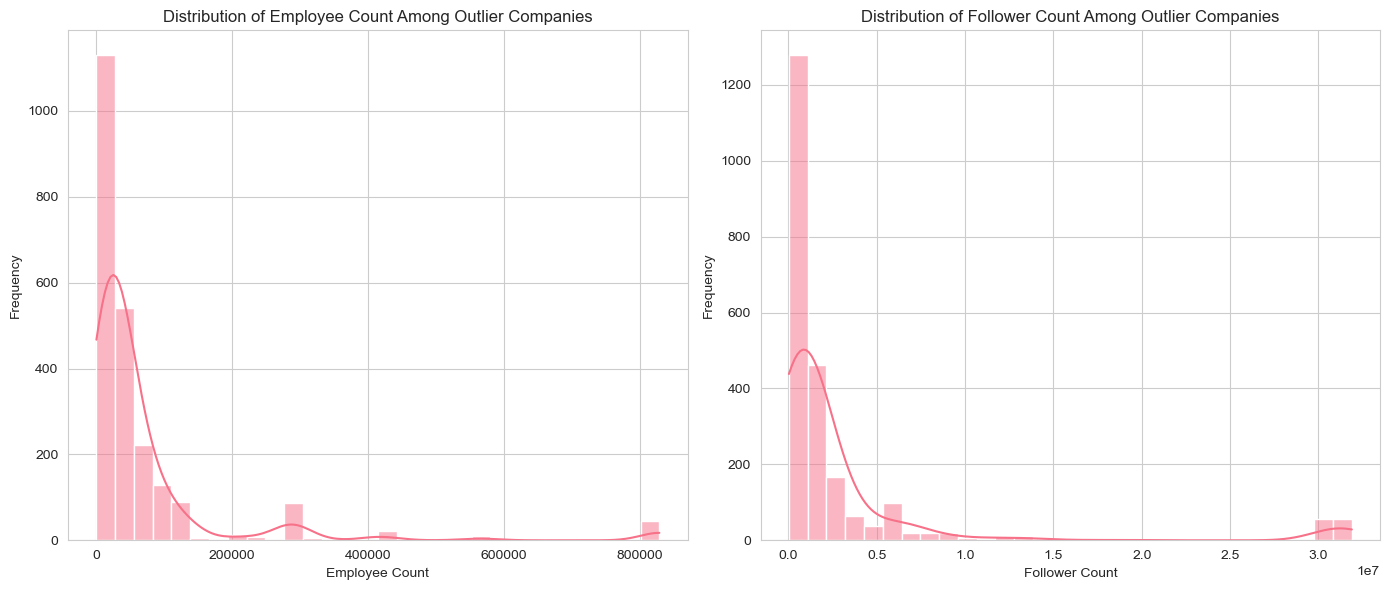

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette of the plots
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the distribution of employee_count among outlier companies
sns.histplot(data=employee_outliers, x='employee_count', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Employee Count Among Outlier Companies')
axes[0].set_xlabel('Employee Count')
axes[0].set_ylabel('Frequency')

# Plot the distribution of follower_count among outlier companies
sns.histplot(data=employee_outliers, x='follower_count', bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Follower Count Among Outlier Companies')
axes[1].set_xlabel('Follower Count')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


The histograms above show the distributions of employee_count and follower_count among the outlier companies.

Observations:
Employee Count:

Most of the outlier companies have an employee count below 200,000, but there are a few companies with a very high employee count, indicating extreme outliers.
Follower Count:

The follower count shows a similar pattern, with a few companies having an extremely high number of followers.

Identify the companies associated with the extreme outliers in both employee_count and follower_count

In [66]:
# Identify extreme outliers in employee_count
extreme_employee_outliers = employee_outliers[
    employee_outliers['employee_count'] > employee_outliers['employee_count'].quantile(0.95)]

# Identify extreme outliers in follower_count
extreme_follower_outliers = employee_outliers[
    employee_outliers['follower_count'] > employee_outliers['follower_count'].quantile(0.95)]

# Display the extreme outliers
extreme_employee_outliers, extreme_follower_outliers

(       company_id  employee_count  follower_count       time_recorded
 206          1318          290150         7770078 2023-08-22 06:08:32
 233          1318          290150         7770078 2023-08-22 06:08:37
 681        157240          296827         6146253 2023-08-23 19:07:06
 722          1353          567835        13592250 2023-08-23 19:09:46
 753          1318          290191         7782514 2023-08-23 19:12:27
 ...           ...             ...             ...                 ...
 15385        2646          415054         4497560 2023-08-24 08:55:31
 15437        2646          415054         4497562 2023-08-24 08:57:32
 15458        2646          415054         4497562 2023-08-24 08:58:03
 15516        2646          415054         4497564 2023-08-24 09:00:35
 15627        2677          538566         2077759 2023-08-24 09:04:39
 
 [99 rows x 4 columns],
        company_id  employee_count  follower_count       time_recorded
 188          1441          285743        30762143 

In [67]:
employee_counts_df.to_csv('cleaned_employee_counts.csv', index=False)

3. The company_industries.csv dataset consists of the following columns:

company_id: A unique identifier for each company.
industry: The industry in which the company operates.

In [68]:
# Load the second dataset
company_industries_df = pd.read_csv('company_industries.csv')

# Display the first few rows of the DataFrame
company_industries_df.head()


,company_id,industry
0,81149246,Higher Education
1,10033339,Information Technology & Services
2,6049228,Accounting
3,2641066,Electrical & Electronic Manufacturing
4,96649998,Marketing & Advertising


In [69]:
# Check for missing values in the dataset
company_industries_missing_values = company_industries_df.isnull().sum()

company_industries_missing_values


company_id    0
industry      0
dtype: int64

There are no missing values in the company_industries.csv dataset, which is great.

In [70]:
# Check for duplicate rows in the company industries dataset
duplicate_rows_industries = company_industries_df[company_industries_df.duplicated()]
num_duplicate_rows_industries = duplicate_rows_industries.shape[0]

num_duplicate_rows_industries, duplicate_rows_industries.head()  # Display the number and first few rows of duplicates if any


(9877,
     company_id                           industry
 34      298409              Staffing & Recruiting
 44        6979  International Trade & Development
 45        6979  International Trade & Development
 46        6979  International Trade & Development
 50    81886402             Hospital & Health Care)

There are 9877 duplicate rows in the company_industries.csv dataset.

In [71]:
# Select a few companies with duplicate entries
sample_duplicates = company_industries_df[company_industries_df.duplicated(subset=['company_id'], keep=False)]

# Display the duplicate entries for these companies
sample_duplicates.sort_values(by='company_id').head(10)


,company_id,industry
8501,1009,Information Technology & Services
8496,1009,Information Technology & Services
8495,1009,Information Technology & Services
8494,1009,Information Technology & Services
8493,1009,Information Technology & Services
8492,1009,Information Technology & Services
8491,1009,Information Technology & Services
8490,1009,Information Technology & Services
8500,1009,Information Technology & Services
8497,1009,Information Technology & Services


It appears that there are multiple entries for the same company with the same industry. This could be an error, as it doesn't make sense for a company to be listed multiple times under the same industry category.

1. Remove Duplicate Entries: We should consider removing duplicate entries where both the company_id and industry are the same, as they don't provide additional information and could skew the analysis.

2. Retain Unique Entries: If a company is listed under multiple different industries, we should retain these entries, as companies can operate in more than one industry.

In [72]:
# Remove exact duplicate rows
company_industries_df.drop_duplicates(inplace=True)

# Display the number of remaining rows and the first few rows of the cleaned DataFrame
num_rows_after_deduplication = company_industries_df.shape[0]
num_rows_after_deduplication, company_industries_df.head()


(6003,
    company_id                               industry
 0    81149246                       Higher Education
 1    10033339      Information Technology & Services
 2     6049228                             Accounting
 3     2641066  Electrical & Electronic Manufacturing
 4    96649998                Marketing & Advertising)

successfully removed the exact duplicate entries, and now we have 6003 unique rows in the company_industries.csv dataset.

In [73]:
# Convert the 'industry' column to lowercase
company_industries_df['industry'] = company_industries_df['industry'].str.lower()

# Display the first few rows of the DataFrame to confirm the changes
company_industries_df.head()

,company_id,industry
0,81149246,higher education
1,10033339,information technology & services
2,6049228,accounting
3,2641066,electrical & electronic manufacturing
4,96649998,marketing & advertising


In [74]:
company_industries_df.to_csv('cleaned_company_industries.csv', index=False)

The industry column has been successfully converted to lowercase. The company_industries.csv dataset is now cleaned with no missing values, no exact duplicate rows, and consistent text formatting.

4. The company_specialities.csv dataset consists of the following columns:

company_id: A unique identifier for each company.
speciality: The specific specialities or areas of focus for the company.

In [75]:
# Load the third dataset
company_specialities_df = pd.read_csv('company_specialities.csv')

# Display the first few rows of the DataFrame
company_specialities_df.head()

,company_id,speciality
0,81149246,Childrens Music Education
1,81149246,Foundational Music Theory
2,81149246,Child Music Lessons
3,81149246,social emotional learning
4,81149246,social emotional development


In [76]:
# Check for missing values in the dataset
company_specialities_missing_values = company_specialities_df.isnull().sum()

company_specialities_missing_values

company_id    0
speciality    0
dtype: int64

There are no missing values in the company_specialities.csv dataset.

In [77]:
# Check for duplicate rows in the company specialities dataset
duplicate_rows_specialities = company_specialities_df[company_specialities_df.duplicated()]
num_duplicate_rows_specialities = duplicate_rows_specialities.shape[0]

num_duplicate_rows_specialities, duplicate_rows_specialities.head()  # Display the number and first few rows of duplicates if any

(85750,
      company_id         speciality
 80      7573454           Big Data
 288      298409          temporary
 289      298409  temporary-to-hire
 290      298409        direct hire
 291      298409   executive search)

There are 85,750 duplicate rows in the company_specialities.csv dataset. These duplicates could be due to companies having multiple specialties listed, or they could be errors in the data.

Remove Exact Duplicates: We can remove rows where both the company_id and speciality are identical, as this seems to be redundant information.
Retain Unique Entries: We should keep unique combinations of company_id and speciality since companies can have multiple specialties.

In [78]:
# Remove exact duplicate rows
company_specialities_df.drop_duplicates(inplace=True)

# Display the number of remaining rows and the first few rows of the cleaned DataFrame
num_rows_after_deduplication_specialities = company_specialities_df.shape[0]
num_rows_after_deduplication_specialities, company_specialities_df.head()

(42605,
    company_id                    speciality
 0    81149246     Childrens Music Education
 1    81149246     Foundational Music Theory
 2    81149246           Child Music Lessons
 3    81149246     social emotional learning
 4    81149246  social emotional development)

successfully removed the exact duplicate entries, and now we have 42,605 unique rows in the company_specialities.csv dataset.

In [79]:
# Convert the 'speciality' column to lowercase
company_specialities_df['speciality'] = company_specialities_df['speciality'].str.lower()

# Display the first few rows of the DataFrame to confirm the changes
company_specialities_df.head()

,company_id,speciality
0,81149246,childrens music education
1,81149246,foundational music theory
2,81149246,child music lessons
3,81149246,social emotional learning
4,81149246,social emotional development


In [80]:
company_specialities_df.to_csv('cleaned_company_industries.csv', index=False)

In [81]:
import pandas as pd

# Load the dataset
file_path = 'salaries.csv'
salaries_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
salaries_df.head()


,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type
0,1,3378133231,30.0,NaN,22.0,HOURLY,USD,BASE_SALARY
1,2,3690843087,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY
2,3,3691794313,22.0,NaN,19.0,HOURLY,USD,BASE_SALARY
3,4,3691795389,70000.0,NaN,68000.0,YEARLY,USD,BASE_SALARY
4,5,3691797089,22.0,NaN,18.0,HOURLY,USD,BASE_SALARY


In [82]:
# Step 1: Check for missing values
missing_values = salaries_df.isnull().sum()

# Step 2: Validate data types
data_types = salaries_df.dtypes

# Preparing for Step 3 & 4: Checking for duplicates and inconsistency in categorical data
duplicate_entries = salaries_df.duplicated().sum()
unique_pay_periods = salaries_df['pay_period'].unique()
unique_currencies = salaries_df['currency'].unique()
unique_compensation_types = salaries_df['compensation_type'].unique()

missing_values, data_types, duplicate_entries, unique_pay_periods, unique_currencies, unique_compensation_types


(salary_id                0
 job_id                   0
 max_salary            2241
 med_salary           11111
 min_salary            2241
 pay_period               0
 currency                 0
 compensation_type        0
 dtype: int64,
 salary_id              int64
 job_id                 int64
 max_salary           float64
 med_salary           float64
 min_salary           float64
 pay_period            object
 currency              object
 compensation_type     object
 dtype: object,
 0,
 array(['HOURLY', 'YEARLY', 'MONTHLY', 'WEEKLY', 'ONCE'], dtype=object),
 array(['USD'], dtype=object),
 array(['BASE_SALARY'], dtype=object))

In [83]:
salaries_df.to_csv('cleaned_salaries.csv', index=False)